Reading both the test and training files and outputting the heads of the tables.

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
from sklearn import datasets

nltk.download("stopwords")

df_test = pd.read_csv("Corona_NLP_test.csv", header=0, usecols=[4, 5], encoding="latin-1")
df_test.replace(to_replace=["Extremely Negative", "Negative", "Neutral"], value=0, inplace=True)
df_test.replace(to_replace=["Positive", "Extremely Positive"], value=1, inplace=True)
df_test.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,1
3,#Panic buying hits #NewYork City as anxious sh...,0
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [ ]:
df_train = pd.read_csv("Corona_NLP_train.csv", header=0, usecols=[4, 5], encoding="latin-1")
df_train.replace(to_replace=["Extremely Negative", "Negative", "Neutral"], value=0, inplace=True)
df_train.replace(to_replace=["Positive", "Extremely Positive"], value=1, inplace=True)
df_train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0


Creating a distribution plot of the "Sentiment" class for the train data set.

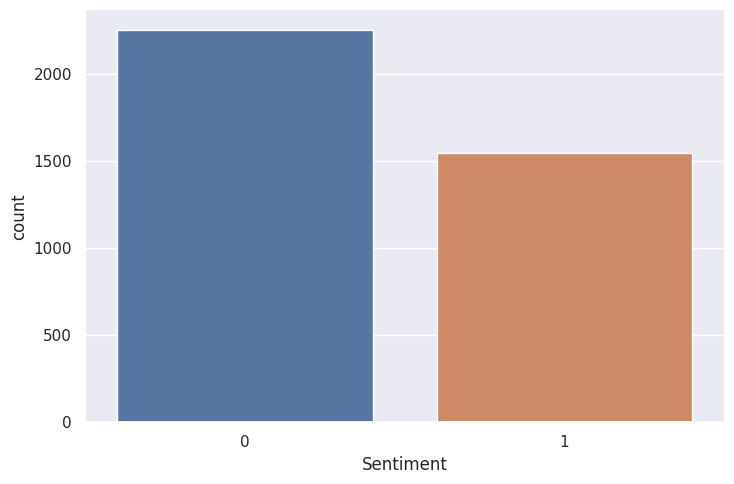

In [ ]:
sb.catplot(x="Sentiment", kind="count", data=df_test, aspect=1.5)

This data set revolves around a sentiment score based off of tweets relating to the coronavirus. There are 2 values, 0 being neutral or negative, and 1 being positive. The model should be able to predict a sentiment score from a given test set. 

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Removing stopwords and creating a tf-idf representation of given data.
stopwords = set(stopwords.words("english"))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

In [ ]:
X_train = df_train.OriginalTweet
y_train = df_train.Sentiment

In [ ]:
X_train.head()

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: OriginalTweet, dtype: object

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64

In [ ]:
X_test = df_test.OriginalTweet
y_test = df_test.Sentiment

In [ ]:
X_train.shape

(41157,)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print("train size:", X_train.shape)
print(X_train.toarray()[:5])

print("\ntest size:", X_test.shape)
print(X_test.toarray()[:5])

train size: (41157, 80282)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (3798, 80282)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
import math

prior_p = sum(y_train == 1)/len(y_train)
print("prior sentiment:", prior_p, "log of prior:", math.log(prior_p))

naive_bayes.class_log_prior_[1]

prior sentiment: 0.4384673324100396 log of prior: -0.8244699684398286


-0.8244699684398284

In [ ]:
naive_bayes.feature_log_prob_

array([[ -9.38804001,  -8.16406346, -12.04493565, ..., -11.87318786,
        -11.86739372, -11.90186844],
       [ -9.6411494 ,  -8.23589124, -11.67259329, ..., -11.94642291,
        -11.94642291, -11.94642291]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

pred = naive_bayes.predict(X_test)

print(confusion_matrix(y_test, pred))

[[2142  110]
 [ 832  714]]


In [ ]:
print("Accuracy score: ", accuracy_score(y_test, pred))

print("\nPrecision score (not positive): ", precision_score(y_test, pred, pos_label = 0))
print("Precision score (positive): ", precision_score(y_test, pred))

print("\nRecall score (not positive): ", recall_score(y_test, pred, pos_label=0))
print("Recall score (positive): ", recall_score(y_test, pred))

print("\nf1 score: ", f1_score(y_test, pred))

Accuracy score:  0.7519747235387045

Precision score (not positive):  0.7202420981842637
Precision score (positive):  0.866504854368932

Recall score (not positive):  0.9511545293072824
Recall score (positive):  0.46183699870633893

f1 score:  0.6025316455696202


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      2252
           1       0.87      0.46      0.60      1546

    accuracy                           0.75      3798
   macro avg       0.79      0.71      0.71      3798
weighted avg       0.78      0.75      0.73      3798



So Naive Bayes produced an accuracy of around 75% with a rather simple implementation. Next will be Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train = df_train.OriginalTweet
y_train = df_train.Sentiment

pipe1 = Pipeline([
        ("tfidf", TfidfVectorizer(binary=True)),
        ("logreg", LogisticRegression(solver="lbfgs", class_weight="balanced")),])
pipe1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer(binary=True)),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [ ]:
X_test = df_test.OriginalTweet
y_test = df_test.Sentiment

pred = pipe1.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, pred))
print("Precision score: ", precision_score(y_test, pred))
print("Recall score: ", recall_score(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))
probs = pipe1.predict_proba(X_test)
print("log loss: ", log_loss(y_test, probs))

Accuracy score:  0.8449183780937335
Precision score:  0.8041958041958042
Recall score:  0.8182406209573092
f1 score:  0.8111574222507214
log loss:  0.40858377806328056


Using Logistic Regression with pipelines brought the accuracy up by nearly 10%. It is certainly an improvement over Naive Bayes. Finally onto neural networks.

In [ ]:
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words=list(stopwords), binary=True)

X = vectorizer.fit_transform(df_train.OriginalTweet)
y = df_train.Sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(30, 2), random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 2), random_state=1,
              solver='lbfgs')

In [ ]:
pred = classifier.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, pred))
print("Precision score: ", precision_score(y_test, pred))
print("Recall score: ", recall_score(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

Accuracy score:  0.8522837706511176
Precision score:  0.8371501272264631
Recall score:  0.8222715912246599
f1 score:  0.8296441580274587


I set the hidden units for the NN to 30 and it took about 1 minute to compile. The more units, the higher my accuracy goes. I decided to keep the hidden unit size at 30 and it resulted in about 85% accuracy. It could definitely go higher with more, but I'll refrain. 